<a href="https://colab.research.google.com/github/royal-dit/tensorflow-deeplearning/blob/main/Advance_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#upsampling vs Conv2D Transpose

In [ ]:
import numpy as np 
import tensorflow as tf


In [ ]:
X = np.asarray([[1,2,3],
                [4,5,6],
                [7,8,9]
                ])

In [ ]:
X_reshape = X.reshape(1,3,3,1)

In [ ]:
X_reshape.shape

(1, 3, 3, 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,3,1)),
    tf.keras.layers.UpSampling2D(size = (2,2))
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 6, 6, 1)          0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
upsampled_x = model.predict(X_reshape)

1/1 [==============================] - 0s 118ms/step


In [ ]:
upsampled_x = upsampled_x.reshape(upsampled_x.shape[1],upsampled_x.shape[2])

In [ ]:
upsampled_x

array([[1., 1., 2., 2., 3., 3.],
       [1., 1., 2., 2., 3., 3.],
       [4., 4., 5., 5., 6., 6.],
       [4., 4., 5., 5., 6., 6.],
       [7., 7., 8., 8., 9., 9.],
       [7., 7., 8., 8., 9., 9.]], dtype=float32)

**Conv2Dtranspose**

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,3,1)),
    tf.keras.layers.Conv2DTranspose(1,(1,1),strides=(2,2),kernel_initializer='ones' )
])

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_1 (Conv2DT  (None, 6, 6, 1)          2         
 ranspose)                                                       
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_conv2dtrans = model1.predict(X_reshape)
X_conv2dtrans = X_conv2dtrans.reshape(X_conv2dtrans.shape[1],X_conv2dtrans.shape[2])
X_conv2dtrans

1/1 [==============================] - 0s 49ms/step


array([[1., 0., 2., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0.],
       [4., 0., 5., 0., 6., 0.],
       [0., 0., 0., 0., 0., 0.],
       [7., 0., 8., 0., 9., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

#Higest accuracy in lowest dataset(dog vs cat)


**Using Logistic Regression**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/random images/dog vs cat/training_set/training_set"
test_dir = "/content/drive/MyDrive/Colab Notebooks/random images/dog vs cat/test_set/test_set"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 shuffle = True,
                                                                 image_size = (224,224),
                                                                 label_mode = "binary",
                                                                 batch_size = 50, 
                                                                 )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                shuffle = True,
                                                                image_size = (224,224),
                                                                label_mode = "binary",
                                                                batch_size = 15
                                                                )

                                                                
                                                                

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
len(train_data),len(test_data)

(161, 135)

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(50, 224, 224, 3)
[[1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [ ]:
label_batch_zero = [x for x in label_batch if x == 0]
label_batch_one = [y for y in label_batch if y == 1]
len(label_batch_zero),len(label_batch_one)

(25, 25)

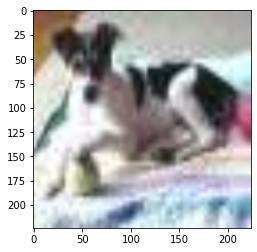

In [ ]:
plt.imshow(image_batch[1].numpy().astype('uint8'))


In [ ]:
def get_partation(ds,train_size =0.01):
  ds_size = len(ds)
  train_size = int(train_size*ds_size)
  train_data = ds.take(train_size)
  return train_data
  
  

In [ ]:
def get_partation_test(ds,test_size = 0.01):
  ds_size = len(ds)
  test_size = int(test_size*ds_size)
  test_data = ds.take(test_size)
  return test_data

In [ ]:
train_data = get_partation(ds = train_data)

In [ ]:
test_data = get_partation_test(ds = test_data)

In [ ]:
len(train_data)

1

In [ ]:
len(test_data)

1

In [ ]:
#for train_data
for img_batch,lab_batch in train_data:
  print(img_batch.shape)
  print(lab_batch.numpy())

(50, 224, 224, 3)
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [ ]:
label_batch_zero = [x for x in lab_batch if x == 0]
label_batch_one = [y for y in lab_batch if y == 1]
len(label_batch_zero),len(label_batch_one)

(24, 26)

In [ ]:
#for test data 
for img_batch_test,lab_batch_test in test_data:
  print(img_batch_test.shape)
  print(lab_batch_test.numpy())

(15, 224, 224, 3)
[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


**Logistic regression**

In [ ]:
X_train = img_batch.numpy()
y_train = label_batch.numpy()

In [ ]:
X_test = img_batch_test.numpy()
y_test = lab_batch_test.numpy()

In [ ]:
X_train_reshaped = X_train.reshape(50,224*224*3)
y_train = y_train.reshape(50,1)

In [ ]:
X_test_reshape = X_test.reshape(15,224*224*3)
y_test = y_test.reshape(15,1)

In [ ]:
X_train.shape,y_train.shape

((50, 224, 224, 3), (50, 1))

In [ ]:
X_test_reshape.shape,y_test.shape

((15, 150528), (15, 1))

In [ ]:
X_train_reshaped.shape

(50, 150528)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_reshaped,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test_reshape)

In [ ]:
y_pred[:5]

array([0., 0., 1., 1., 1.], dtype=float32)

In [ ]:
y_test[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.3333333333333333


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2 5]
 [5 3]]


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_reshaped,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test_reshape)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.2


**SVM**

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel = "poly")
sv.fit(X_train_reshaped,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
y_pred_svm = sv.predict(X_test_reshape)

In [ ]:
print(accuracy_score(y_test,y_pred_svm))

0.3333333333333333


**cnn**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation="relu",input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(8,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(4,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 8)       1160      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 8)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 4)       292       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 4)        0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 4)                0

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"]
              )

In [ ]:
history = model.fit(train_data,
                    epochs = 5,
                    steps_per_epoch = len(train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data) 
                    )

Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 1.8095 - accuracy: 0.4200 - val_loss: 0.6546 - val_accuracy: 0.6000
Epoch 2/5
1/1 [==============================] - 5s 5s/step - loss: 0.7054 - accuracy: 0.5000 - val_loss: 0.7220 - val_accuracy: 0.5333
Epoch 3/5
1/1 [==============================] - 7s 7s/step - loss: 0.6806 - accuracy: 0.6000 - val_loss: 0.5996 - val_accuracy: 0.7333
Epoch 4/5
1/1 [==============================] - 5s 5s/step - loss: 0.6564 - accuracy: 0.7000 - val_loss: 0.6916 - val_accuracy: 0.5333
Epoch 5/5
1/1 [==============================] - 5s 5s/step - loss: 0.7286 - accuracy: 0.6000 - val_loss: 0.7148 - val_accuracy: 0.5333


In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 1s 574ms/step - loss: 0.7208 - accuracy: 0.4000


[0.7207842469215393, 0.4000000059604645]

Text(0, 0.5, 'epochs')

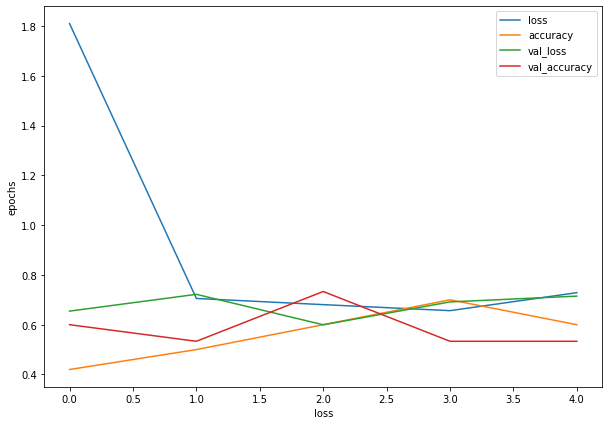

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.xlabel("loss")
plt.ylabel("epochs")

In [ ]:
y_test_pred = model.predict(test_data)


1/1 [==============================] - 1s 674ms/step


In [ ]:
y_test_pred[:10]

array([[0.40812862],
       [0.41919684],
       [0.3832982 ],
       [0.48239937],
       [0.4868644 ],
       [0.22050582],
       [0.43200395],
       [0.33980027],
       [0.2989171 ],
       [0.44683328]], dtype=float32)

In [ ]:
import matplotlib.image as mpimg

In [ ]:
cat = mpimg.imread("/content/cat.jpg")
dog = mpimg.imread("//content/drive/MyDrive/Colab Notebooks/random images/dog vs cat/training_set/training_set/dogs/dog.1.jpg")

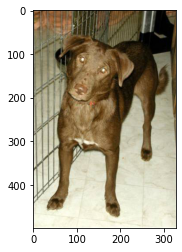

In [ ]:
plt.imshow(dog)

In [ ]:
img = tf.io.read_file("/content/drive/MyDrive/Colab Notebooks/random images/dog vs cat/training_set/training_set/dogs/dog.1004.jpg")
img = tf.image.decode_image(img)
img = tf.image.resize(img,size=[224,224])
img = img/255

In [ ]:
new_img = tf.expand_dims(img,axis = 0)

In [ ]:
new_img.shape

TensorShape([1, 224, 224, 3])

1/1 [==============================] - 0s 109ms/step
cats


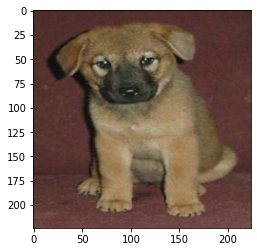

In [ ]:

image_pred = model.predict(new_img)
# pred_img = tf.argmax(image_pred,axis = 1)
pred_class_name = class_names[int(tf.round(image_pred))]
print(pred_class_name)
plt.imshow(img)

In [ ]:
print(image_pred)

[[0.49871698]]


#extracting patches from large images and mask

#image segmentation using unet (Malaria dataset)

**Malaria detection**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from PIL import Image
import cv2

In [15]:
#calling helper func from github 
!wget https://raw.githubusercontent.com/royal-dit/tensorflow-deeplearning/main/helper_func.py 


--2023-02-23 17:47:03--  https://raw.githubusercontent.com/royal-dit/tensorflow-deeplearning/main/helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12051 (12K) [text/plain]
Saving to: ‘helper_func.py’

helper_func.py      100%[===================>]  11.77K  --.-KB/s    in 0s      

2023-02-23 17:47:04 (96.4 MB/s) - ‘helper_func.py’ saved [12051/12051]



In [25]:
from helper_func import plot_loss_curves,make_confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir = "/content/drive/MyDrive/Colab Notebooks/random images/malaria_pred/"

In [4]:
SIZE = 64
dataset = []
label = []



In [5]:
parasitized_images = os.listdir(dir+'Parasitized/')
for i, image_name in enumerate(parasitized_images):
  if (image_name.split('.')[1]=='png'):
    image = cv2.imread(dir+"Parasitized/"+image_name)
    image =  Image.fromarray(image,'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)




In [6]:
uninfected_images  = os.listdir(dir+"Uninfected/")
for i ,image_name in enumerate(uninfected_images):
  if(image_name.split('.')[1]=='png'):
    image = cv2.imread(dir+"Uninfected/"+image_name)
    image = Image.fromarray(image,"RGB")
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)


In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [8]:
X_train,X_test,y_train,y_test = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.2,random_state = 42)

In [41]:
from keras.utils import to_categorical

# Create a class vector with 3 samples and 4 classes
y = [0, 1, 2, 2]

# Convert the class vector to a binary matrix
y_binary = to_categorical(y, num_classes=4)

print(y_binary)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [18]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

In [9]:
from tensorflow.keras.applications import ResNet50


In [10]:
resnet = ResNet50(include_top = False,weights = "imagenet") #fully connected layers of last layer will be not included

94765736/94765736 [==============================] - 0s 0us/step


**Using functional api**

In [30]:
resnet.trainable = False
inputs  = tf.keras.layers.Input(shape = (64,64,3))
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = resnet(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2)(x)
outputs = tf.keras.layers.Activation("softmax",dtype = tf.float32)(x)
model = tf.keras.Model(inputs,outputs)




In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
___________________________________________

In [32]:
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              
              )

In [34]:
history  = model.fit(np.array(X_train),y_train,epochs = 10,batch_size = 64)
                     

Epoch 1/10
276/276 [==============================] - 7s 24ms/step - loss: 0.2081 - accuracy: 0.9200
Epoch 2/10
276/276 [==============================] - 7s 24ms/step - loss: 0.2169 - accuracy: 0.9154
Epoch 3/10
276/276 [==============================] - 6s 23ms/step - loss: 0.2026 - accuracy: 0.9206
Epoch 4/10
276/276 [==============================] - 7s 24ms/step - loss: 0.1962 - accuracy: 0.9220
Epoch 5/10
276/276 [==============================] - 6s 23ms/step - loss: 0.1984 - accuracy: 0.9204
Epoch 6/10
276/276 [==============================] - 7s 24ms/step - loss: 0.1843 - accuracy: 0.9269
Epoch 7/10
276/276 [==============================] - 6s 23ms/step - loss: 0.1889 - accuracy: 0.9258
Epoch 8/10
276/276 [==============================] - 7s 24ms/step - loss: 0.1949 - accuracy: 0.9228
Epoch 9/10
276/276 [==============================] - 6s 23ms/step - loss: 0.1933 - accuracy: 0.9244
Epoch 10/10
276/276 [==============================] - 7s 24ms/step - loss: 0.1839 - accura

In [59]:
model.save("resnet_malarai_pred.h5")

In [35]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    Args:
      history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
    """
    loss = history.history['loss']
    # val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    # val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    # plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    # plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


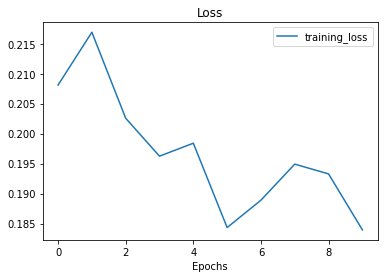

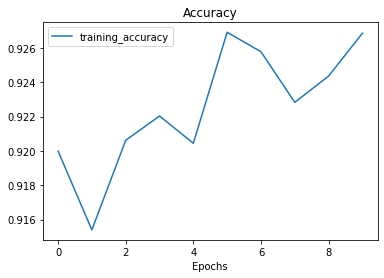

In [36]:
plot_loss_curves(history)

In [37]:
y_pred = model.predict(np.array(X_test))

173/173 [==============================] - 3s 14ms/step


In [38]:
y_pred[:5]

array([[7.2301960e-01, 2.7698040e-01],
       [2.4385008e-03, 9.9756145e-01],
       [2.3260318e-04, 9.9976736e-01],
       [2.1765491e-02, 9.7823447e-01],
       [3.5090219e-02, 9.6490973e-01]], dtype=float32)

In [42]:
y_pred = np.argmax(y_pred,axis = 1)
y_pred[:5]

array([0, 1, 1, 1, 1])

In [45]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/malaria infected.jpg",target_size = (64,64))

In [46]:
x = image.img_to_array(img)

In [47]:
x.shape

(64, 64, 3)

In [48]:
x=x/255

In [49]:
x = tf.expand_dims(x,axis = 0)

In [50]:
x.shape

TensorShape([1, 64, 64, 3])

In [55]:
model.predict(x)

1/1 [==============================] - 0s 27ms/step


array([[0.69060063, 0.30939934]], dtype=float32)

In [56]:
x_pred = tf.argmax(X_pred,axis =1)

In [57]:
x_pred

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>

In [58]:
if x_pred == 0:
  print('parasitized')
else:
  print('uninfected')

parasitized
